# 🤖 Reinforcement Learning (RL): The Big Picture

Reinforcement Learning is a type of **machine learning** where an **agent** learns to make decisions by **interacting with an environment** to maximize some notion of **cumulative reward**.

---

## 🧱 Core Components of RL

| Component      | Description                                                  |
|----------------|--------------------------------------------------------------|
| Agent          | Learner or decision maker (e.g. robot, AI player)            |
| Environment    | The world the agent interacts with (e.g. game, simulation)   |
| State `s`      | Current situation the agent is in                            |
| Action `a`     | A decision or move the agent can take                        |
| Reward `r`     | Feedback from environment after an action                    |
                         |
| Value Function | Long-term expected reward from a state                      |

| Policy `π(a|s)` |Strategy that the agent follows

---


## 🔁 RL Interaction Loop



In [ ]:
[Agent] --action--> [Environment] --reward + new state--> [Agent]


The agent:
1. Observes state `s`
2. Chooses an action `a`
3. Receives reward `r`
4. Moves to next state `s'`

Over time, the agent **learns a policy**: `π(s) → a` that **maximizes cumulative reward**.

---

# 📚 What is Q-Learning?

Q-Learning is a **model-free, off-policy reinforcement learning algorithm**.  
It aims to **learn the optimal action-value function** `Q*(s, a)` that tells us:
> "If I'm in state `s` and take action `a`, how good is that decision in the long run?"

It is **tabular** (stores Q-values in a table) and uses the **Bellman Optimality Equation** for updates.



#  Mathematical Foundation of Q-Learning

The **Bellman Equation** is a formula used in **reinforcement learning** to **calculate the value of a state.** It says that the value of a state is equal to the reward received now plus the expected value of the next state. This helps an agent **make better decisions by considering both** immediate and future rewards. It is based on the principle of optimality which means the best value of a state depends on the immediate reward and the value of the next state.

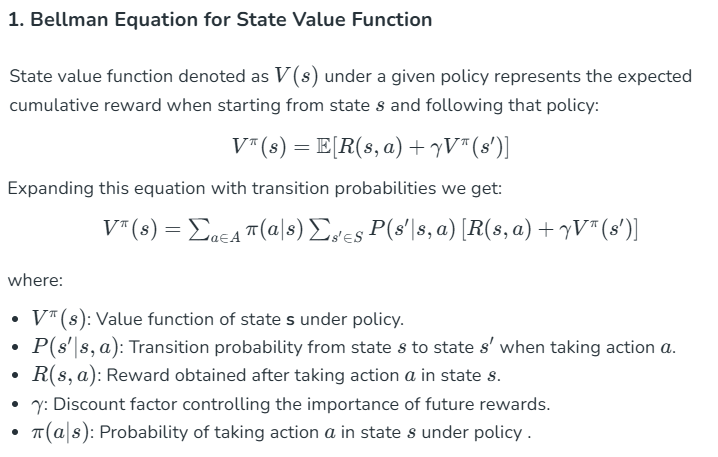

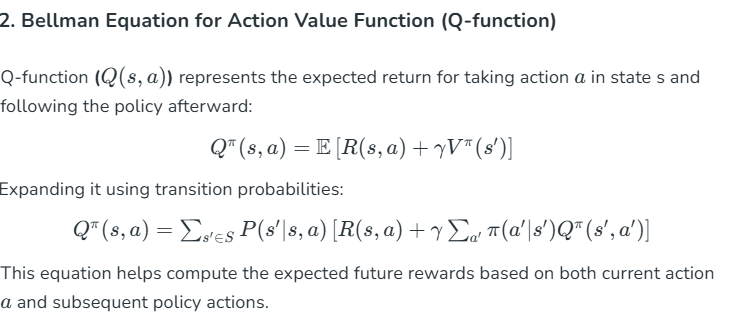

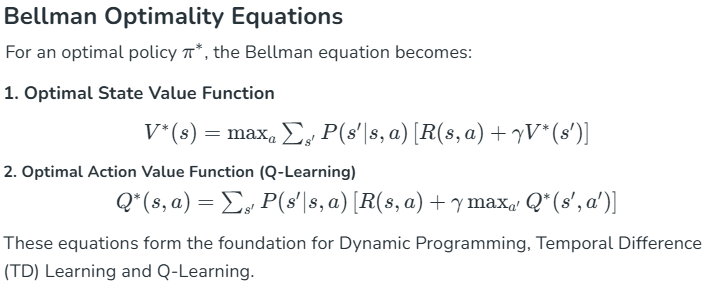

In [ ]:
import numpy as np

states = 5
actions = 2
Q = np.zeros((states, actions))
alpha = 0.1
gamma = 0.9
epsilon = 0.2

for episode in range(100):
    state = np.random.randint(0, states)
    for step in range(10):
        action = np.random.choice(actions) if np.random.rand() < epsilon else np.argmax(Q[state])
        next_state = (state + 1) % states
        reward = 1 if next_state == states - 1 else 0
        Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])
        state = next_state

print("Q-table:\n", Q)

Q-table:
 [[1.46668581 0.86289843]
 [1.66142368 1.11466322]
 [1.88096908 1.34523437]
 [2.1254529  1.73605592]
 [1.2882562  0.88351483]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random


In [ ]:
class GridWorld:
    def __init__(self, size=4):
        self.size = size
        self.start = (0, 0)
        self.goal = (size-1, size-1)
        self.reset()

    def reset(self):
        self.agent_pos = self.start
        return self._pos_to_state(self.agent_pos)

    def step(self, action):
        x, y = self.agent_pos
        if action == 0: x = max(0, x - 1)     # UP
        elif action == 1: x = min(self.size - 1, x + 1) # DOWN
        elif action == 2: y = max(0, y - 1)   # LEFT
        elif action == 3: y = min(self.size - 1, y + 1) # RIGHT
        self.agent_pos = (x, y)
        reward = 1 if self.agent_pos == self.goal else 0
        done = self.agent_pos == self.goal
        return self._pos_to_state(self.agent_pos), reward, done

    def _pos_to_state(self, pos):
        return pos[0] * self.size + pos[1]

    def num_states(self):
        return self.size * self.size

    def render_q_table(self, q_table):
        q_grid = np.max(q_table, axis=1).reshape(self.size, self.size)
        sns.heatmap(q_grid, annot=True, cmap="YlGnBu")
        plt.title("Q-Values Heatmap (Best Action per Cell)")
        plt.show()


In [ ]:
def q_learning_gridworld(episodes=500, alpha=0.1, gamma=0.9, epsilon=1.0, decay=0.995):
    env = GridWorld()
    n_states = env.num_states()
    n_actions = 4  # up, down, left, right
    q_table = np.zeros((n_states, n_actions))

    for ep in range(episodes):
        state = env.reset()
        done = False

        while not done:
            if np.random.rand() < epsilon:
                action = np.random.choice(n_actions)
            else:
                action = np.argmax(q_table[state])

            next_state, reward, done = env.step(action)
            q_table[state, action] += alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state, action])
            state = next_state

        epsilon *= decay

    env.render_q_table(q_table)
    return q_table


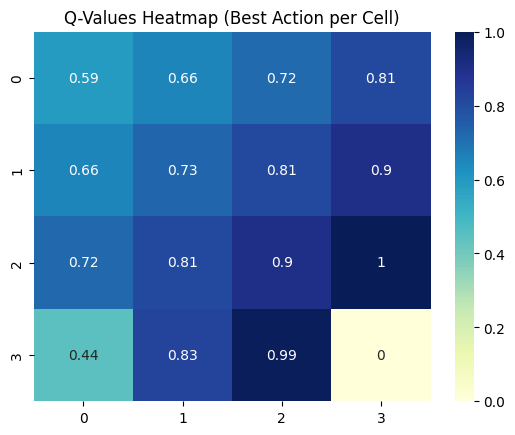

In [ ]:
q_table_grid = q_learning_gridworld()


In [ ]:
###  Snake game to see performance

In [ ]:
import numpy as np
import random

class SnakeEnv:
    def __init__(self, grid_size=10):
        self.grid_size = grid_size
        self.reset()

    def reset(self):
        self.snake = [(self.grid_size // 2, self.grid_size // 2)]
        self.direction = (0, 1)  # initially moving right
        self.place_food()
        self.done = False
        self.steps = 0
        self.length = 1
        return self.get_state()

    def place_food(self):
        while True:
            self.food = (random.randint(0, self.grid_size - 1), random.randint(0, self.grid_size - 1))
            if self.food not in self.snake:
                break

    def get_state(self):
        head = self.snake[0]
        food = self.food

        # Danger (front, left, right)
        danger = self.get_danger_signals()

        # Food direction (food is on left/right/up/down)
        food_dir = [
            int(food[1] < head[1]),  # left
            int(food[0] < head[0]),  # up
            int(food[1] > head[1]),  # right
            int(food[0] > head[0])   # down
        ]

        # Direction the snake is facing
        dir_flags = self.get_dir_flags()

        return tuple(danger + food_dir + dir_flags)

    def get_dir_flags(self):
        dir_map = {
            (-1, 0): [1, 0, 0, 0],  # up
            (1, 0): [0, 1, 0, 0],   # down
            (0, -1): [0, 0, 1, 0],  # left
            (0, 1): [0, 0, 0, 1],   # right
        }
        return dir_map[self.direction]

    def get_danger_signals(self):
        # Check danger in front, left, right
        def collision(pos):
            x, y = pos
            return (
                x < 0 or x >= self.grid_size or
                y < 0 or y >= self.grid_size or
                pos in self.snake
            )

        head = self.snake[0]
        dx, dy = self.direction

        left = (-dy, dx)
        right = (dy, -dx)
        directions = [self.direction, left, right]

        return [int(collision((head[0] + d[0], head[1] + d[1]))) for d in directions]

    def step(self, action):
        if self.done:
            return self.get_state(), 0, True

        # Turn left / straight / right
        dx, dy = self.direction
        if action == 0:   # left
            self.direction = (-dy, dx)
        elif action == 2: # right
            self.direction = (dy, -dx)

        head_x, head_y = self.snake[0]
        new_head = (head_x + self.direction[0], head_y + self.direction[1])

        self.steps += 1

        # Check collision
        if (
            new_head in self.snake or
            not (0 <= new_head[0] < self.grid_size) or
            not (0 <= new_head[1] < self.grid_size)
        ):
            self.done = True
            return self.get_state(), -1, True

        # Move snake
        self.snake.insert(0, new_head)

        if new_head == self.food:
            reward = 1
            self.length += 1
            self.place_food()
        else:
            self.snake.pop()
            reward = 0

        return self.get_state(), reward, self.done


In [ ]:
def state_to_index(state):
    """Convert 11-bit binary tuple to an integer index."""
    return int("".join(map(str, state)), 2)

def train_q_learning_snake(
    episodes=10000, alpha=0.1, gamma=0.9, epsilon=1.0, epsilon_decay=0.995, min_epsilon=0.01
):
    env = SnakeEnv(grid_size=10)
    n_states = 2 ** 11
    n_actions = 3
    Q = np.zeros((n_states, n_actions))
    lengths = []

    for ep in range(episodes):
        state = env.reset()
        state_idx = state_to_index(state)
        total_reward = 0
        length = 1

        for step in range(1000):  # max steps per episode
            # ε-greedy action
            if np.random.rand() < epsilon:
                action = np.random.choice(n_actions)
            else:
                action = np.argmax(Q[state_idx])

            next_state, reward, done = env.step(action)
            next_state_idx = state_to_index(next_state)

            # Q-learning update
            Q[state_idx, action] += alpha * (reward + gamma * np.max(Q[next_state_idx]) - Q[state_idx, action])

            state_idx = next_state_idx
            total_reward += reward
            length = env.length

            if done:
                break

        epsilon = max(min_epsilon, epsilon * epsilon_decay)
        lengths.append(length)

        if (ep + 1) % 500 == 0:
            print(f"Episode {ep+1}/{episodes} - Length: {length} - Epsilon: {epsilon:.3f}")

    return Q, lengths


In [ ]:
def plot_snake_training(lengths, window=100):
    moving_avg = np.convolve(lengths, np.ones(window)/window, mode='valid')
    plt.figure(figsize=(10, 5))
    plt.plot(moving_avg)
    plt.xlabel("Episode")
    plt.ylabel("Average Snake Length")
    plt.title("Q-Learning on Snake: Average Length Over Time")
    plt.grid()
    plt.show()


Episode 500/5000 - Length: 17 - Epsilon: 0.082
Episode 1000/5000 - Length: 19 - Epsilon: 0.010
Episode 1500/5000 - Length: 6 - Epsilon: 0.010
Episode 2000/5000 - Length: 12 - Epsilon: 0.010
Episode 2500/5000 - Length: 10 - Epsilon: 0.010
Episode 3000/5000 - Length: 7 - Epsilon: 0.010
Episode 3500/5000 - Length: 19 - Epsilon: 0.010
Episode 4000/5000 - Length: 26 - Epsilon: 0.010
Episode 4500/5000 - Length: 7 - Epsilon: 0.010
Episode 5000/5000 - Length: 22 - Epsilon: 0.010


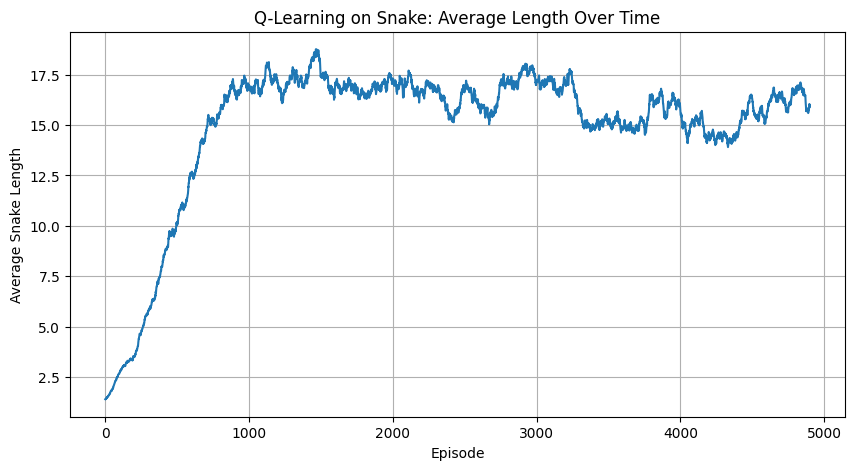

In [ ]:
Q, snake_lengths = train_q_learning_snake(episodes=5000)
plot_snake_training(snake_lengths)

In [ ]:
import time
from IPython.display import clear_output

def render_env(env):
    grid = [[" " for _ in range(env.grid_size)] for _ in range(env.grid_size)]
    for x, y in env.snake:
        grid[x][y] = "S"
    fx, fy = env.food
    grid[fx][fy] = "F"

    print("\n".join("".join(row) for row in grid))
    print("=" * env.grid_size)


In [ ]:
def test_trained_agent(Q, episodes=5, delay=0.2, verbose=True):
    env = SnakeEnv(grid_size=10)
    total_length = 0

    for ep in range(episodes):
        state = env.reset()
        state_idx = state_to_index(state)
        done = False
        steps = 0

        if verbose:
            clear_output(wait=True)
            print(f"Episode {ep + 1}")
            render_env(env)
            time.sleep(delay)

        while not done and steps < 100:
            action = np.argmax(Q[state_idx])
            next_state, reward, done = env.step(action)
            state_idx = state_to_index(next_state)
            steps += 1

            if verbose:
                clear_output(wait=True)
                print(f"Episode {ep + 1}")
                render_env(env)
                time.sleep(delay)

        print(f"Length of snake in episode {ep+1}: {env.length}")
        total_length += env.length

    avg_length = total_length / episodes
    print(f"\nAverage snake length over {episodes} episodes: {avg_length:.2f}")


In [ ]:
test_trained_agent(Q, episodes=5, delay=0.2)


Streaming output truncated to the last 5000 lines.
Episode 1
      F   
          
          
 S        
 SS       
          
          
          
          
          
Episode 1
      F   
          
          
  S       
 SS       
          
          
          
          
          
Episode 1
      F   
          
  S       
  S       
  S       
          
          
          
          
          
Episode 1
      F   
  S       
  S       
  S       
          
          
          
          
          
          
Episode 1
  S   F   
  S       
  S       
          
          
          
          
          
          
          
Episode 1
  SS  F   
  S       
          
          
          
          
          
          
          
          
Episode 1
  SSS F   
          
          
          
          
          
          
          
          
          
Episode 1
   SSSF   
          
          
          
          
          
          
          
          
